# Starter code

### Imports

In [64]:
from neurosity import neurosity_sdk
from dotenv import load_dotenv
import os
import time

load_dotenv()

True

### Initialize device

In [66]:
neurosity = neurosity_sdk({
    "device_id": os.getenv("NEUROSITY_DEVICE_ID"),
})

neurosity.login({
    "email": os.getenv("NEUROSITY_EMAIL"),
    "password": os.getenv("NEUROSITY_PASSWORD")
})

### Test feedback

In [67]:
def callback(data):
    print("data", data)

unsubscribe = neurosity.brainwaves_raw_unfiltered(callback)

time.sleep(0.3)

unsubscribe()

data {'data': [[-2252.385276, 50268.223639, 125783.144835, 76269.560787, 8884.348986, 22470.208578, 119832.261127, 93271.213949, 26824.507188, 3648.005841, 101906.251578, 109504.28003, 45881.067965, -4389.703773, 74262.999995, 122310.488428], [-2090.044557, 45804.356779, 116541.592623, 69082.379749, 7483.766334, 20556.049897, 110683.043971, 85506.620299, 23268.367017, 3675.16321, 93691.985536, 101200.159975, 40548.634671, -3699.571315, 67897.178506, 113368.06961], [136.993841, 7665.28485, 16572.633781, 9034.686818, 1513.905995, 3700.174812, 16526.902112, 11056.603259, 3633.656021, 976.726524, 14553.935991, 13277.1373, 5741.000829, -193.923734, 10968.224462, 15478.426489], [-17692.791448, -6075.33822, -17024.384885, -25915.305284, -22195.282123, -6682.188079, -13142.08806, -24709.249863, -25145.511209, -9392.694707, -9613.440534, -22768.000868, -26358.60743, -13937.161958, -7018.738293, -19889.722047], [-20122.33665, 2190.560352, -5053.68469, -24016.971638, -24857.441928, -2313.80787, 4

### Format data callback

In [40]:
def callback(data):
    channels = {}
    for i in range(len(data["data"])):
        channels["channel" + data["info"]["channelNames"][i]] = data["data"][i]
    print(channels)

unsubscribe = neurosity.brainwaves_raw(callback)

time.sleep(0.3)

unsubscribe()

{'channelCP3': [-14.56600362881252, -11.327955379273586, 1.4612199442557365, 15.044916002777436, 17.23259894959505, 8.46809108918389, -2.8519406999861037, -10.042335413820652, -9.372783141767925, -2.598803921901701, 3.082131130737805, 2.878750008096589, -1.4774808395159416, -6.448611375558251, -9.464538455850551, -9.859128744473391], 'channelC3': [-8.09226066406277, -4.57935863188812, 1.3463318648973512, 7.180520679619445, 7.665690334124629, 2.5527359699461796, -3.90554611449005, -8.264221159346826, -8.687298743377484, -4.503278119605238, 1.9603003612147827, 6.459766403201451, 7.406817289067013, 5.924324800799261, 3.0311330282374325, -0.37437329732508706], 'channelF5': [-9.0740339248108, -4.855763723471516, 3.9620221323144937, 11.988527757222183, 12.087551953235623, 4.145417884375025, -5.880389215976464, -12.12578918790089, -11.476118919378042, -5.071888723495761, 2.0353493769315274, 5.056108454103168, 2.913700914344876, -2.6346257022966957, -8.62950419419603, -12.510381284423211], 'ch

# Visualization

### Imports

In [41]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

### Plot data

In [42]:
def plot(data):
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)

    xar = []
    yar = []
    for index, element in enumerate(data):
            xar.append(index)
            yar.append(element)
    ax1.clear()
    ax1.plot(xar,yar)
    
    plt.show()

### Visualize brainwaves

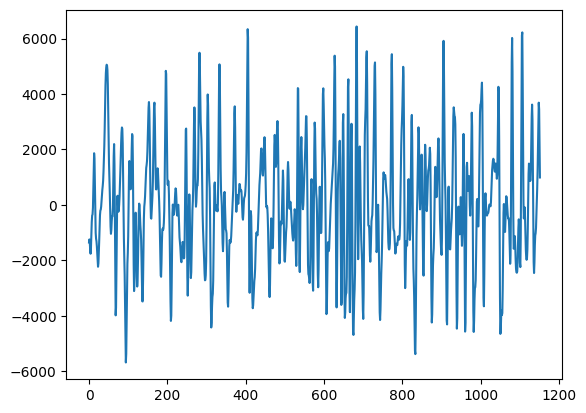

In [56]:
channels = {}
threshold = 8000

def callback(data):
    if len(channels.keys()) != 0:
        for i in range(len(data["data"])):
            raw_data = data["data"][i]
            clean_data = []

            for j in raw_data:
                if abs(j) > threshold:
                    clean_data += [0]
                else:
                    clean_data += [j]
            
            channels["channel" + data["info"]["channelNames"][i]] += clean_data
    else:
        for i in range(len(data["data"])):
            raw_data = data["data"][i]
            clean_data = []

            for j in raw_data:
                if abs(j) > threshold:
                    clean_data += [0]
                else:
                    clean_data += [j]

            channels["channel" + data["info"]["channelNames"][i]] = clean_data

unsubscribe = neurosity.brainwaves_raw(callback)

time.sleep(5)

plot(channels["channelCP3"])

unsubscribe()

### Visualize spectrogram

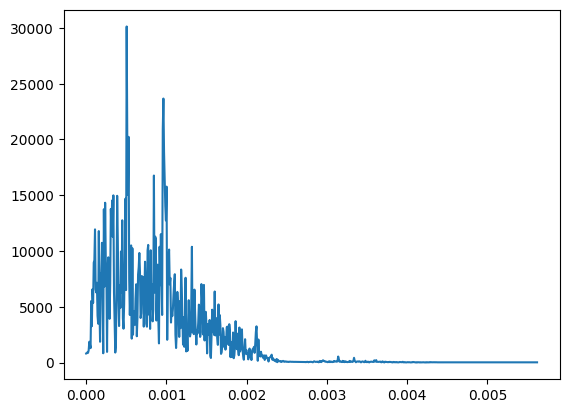

In [57]:
from scipy.fft import rfft, rfftfreq
import numpy as np

# Number of samples in normalized_tone
N = len(channels["channelF5"])

yf = rfft(channels["channelF5"])
xf = rfftfreq(N, N/16)

plt.plot(xf, np.abs(yf))
plt.show()

# Spectrogram tests

### No thought data

In [129]:
no_thought_channels = {}
threshold = 10000

def callback(data):
    if len(no_thought_channels.keys()) != 0:
        for i in range(len(data["data"])):
            raw_data = data["data"][i]
            clean_data = []

            for j in raw_data:
                if abs(j) > threshold:
                    clean_data += [0]
                else:
                    clean_data += [j]
            
            no_thought_channels["channel" + data["info"]["channelNames"][i]] += clean_data
    else:
        for i in range(len(data["data"])):
            raw_data = data["data"][i]
            clean_data = []

            for j in raw_data:
                if abs(j) > threshold:
                    clean_data += [0]
                else:
                    clean_data += [j]

            no_thought_channels["channel" + data["info"]["channelNames"][i]] = clean_data

unsubscribe = neurosity.brainwaves_raw(callback)

time.sleep(5)

unsubscribe()

### Thought data

In [130]:
thought_channels = {}
threshold = 10000

def callback(data):
    if len(thought_channels.keys()) != 0:
        for i in range(len(data["data"])):
            raw_data = data["data"][i]
            clean_data = []

            for j in raw_data:
                if abs(j) > threshold:
                    clean_data += [0]
                else:
                    clean_data += [j]
            
            thought_channels["channel" + data["info"]["channelNames"][i]] += clean_data
    else:
        for i in range(len(data["data"])):
            raw_data = data["data"][i]
            clean_data = []

            for j in raw_data:
                if abs(j) > threshold:
                    clean_data += [0]
                else:
                    clean_data += [j]

            thought_channels["channel" + data["info"]["channelNames"][i]] = clean_data

unsubscribe = neurosity.brainwaves_raw(callback)

time.sleep(5)

unsubscribe()

### Visualize raw waves

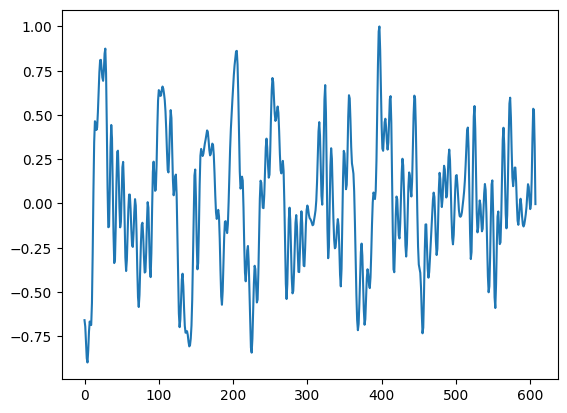

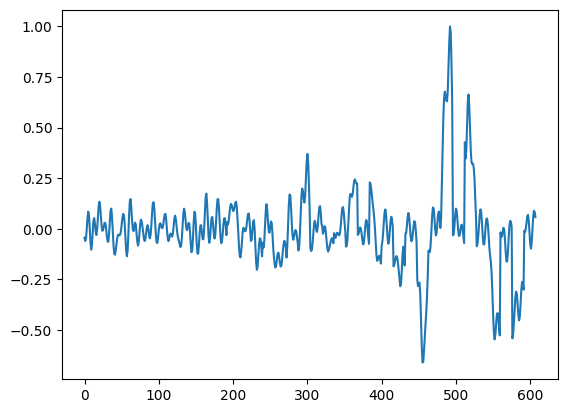

In [131]:
min_len = min(len(no_thought_channels["channelCP3"]), len(thought_channels["channelCP3"]))

thought_normalized = np.array(thought_channels["channelCP3"][:min_len]) / max([abs(i) for i in thought_channels["channelCP3"][:min_len]])
no_thought_normalized = np.array(no_thought_channels["channelCP3"][:min_len]) / max([abs(i) for i in no_thought_channels["channelCP3"][:min_len]])

plot(thought_normalized)

plot(no_thought_normalized)

### Visualize spectrograms

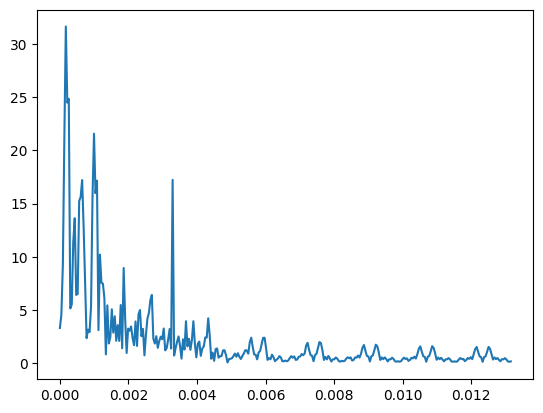

In [132]:
# No thought raw structure

N = min_len

yf = rfft(no_thought_normalized)
xf = rfftfreq(N, N/16)

plt.plot(xf, np.abs(yf))
plt.show()

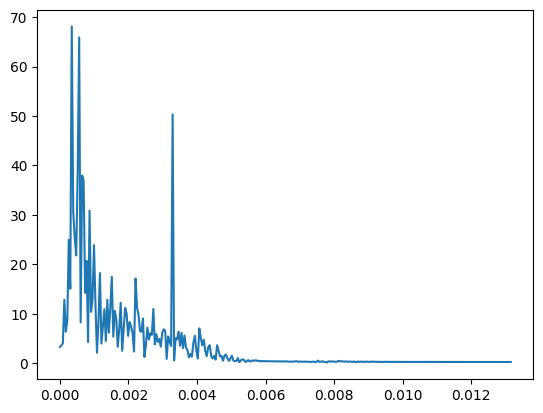

In [133]:
# Thought raw structure

N = min_len

yf = rfft(thought_normalized)
xf = rfftfreq(N, N/16)

plt.plot(xf, np.abs(yf))
plt.show()

In [1]:
# Normalized plots

N = min_len

yf_no_thought = np.abs(rfft(no_thought_normalized))
yf_thought = np.abs(rfft(thought_normalized))

max_val = min(max(yf_thought), max(yf_no_thought))

for i in range(len(yf_no_thought)):
        if yf_no_thought[i] > max_val:
                yf_no_thought[i] = max_val

xf = rfftfreq(N, N/16)


fig, ax = plt.subplots()
ax2 = ax.twinx()

ax.plot(xf,
        yf_thought,
        color="red")

ax2.plot(xf,
        yf_no_thought,
        color="blue")

plt.show()

NameError: name 'min_len' is not defined